<a href="https://colab.research.google.com/github/sonavmorris/MAIN-PROJECT-AUTHENTICATION-OF-AN-INDIVIDUAL-USING-IRIS-RECOGNITION/blob/main/iris_(3).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
from skimage.feature import greycomatrix, greycoprops
import matplotlib.pyplot as plt
img = cv2.imread('sitir5.bmp')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import local_binary_pattern, hog
from skimage.filters import gabor_kernel
from skimage import exposure
from cv2.xfeatures2d import SIFT_create

error: ignored

In [ ]:
from skimage.feature import local_binary_pattern
radius = 3
n_points = 8 * radius
method = 'uniform'
# Compute LBP features
lbp = local_binary_pattern(gray, n_points, radius, method)


In [ ]:
distances = [1, 2, 3]
angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]
glcm = greycomatrix(gray, distances, angles, symmetric=True, normed=True)
contrast = greycoprops(glcm, 'contrast')
energy = greycoprops(glcm, 'energy')
homogeneity = greycoprops(glcm, 'homogeneity')


/usr/local/lib/python3.9/dist-packages/skimage/feature/__init__.py:35: skimage_deprecation: Function ``greycomatrix`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycomatrix`` instead.
  removed_version='1.0')
/usr/local/lib/python3.9/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.9/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')
/usr/local/lib/python3.9/dist-packages/skimage/feature/__init__.py:42: skimage_deprecation: Function ``greycoprops`` is deprecated and will be removed in version 1.0. Use ``skimage.feature.graycoprops`` instead.
  removed_version='1.0')


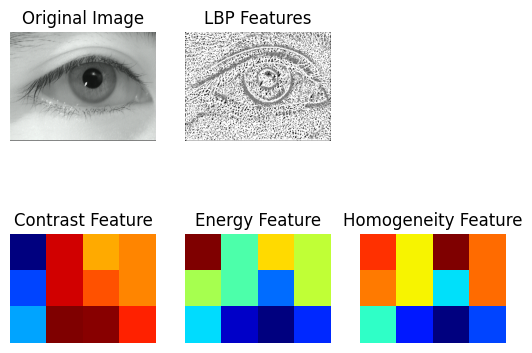

In [ ]:
plt.subplot(2, 3, 1)
plt.imshow(img)
plt.title('Original Image')
plt.axis('off')
plt.subplot(2, 3, 2)
plt.imshow(lbp, cmap='gray')
plt.title('LBP Features')
plt.axis('off')
plt.subplot(2, 3, 4)
plt.imshow(contrast, cmap='jet')
plt.title('Contrast Feature')
plt.axis('off')
plt.subplot(2, 3, 5)
plt.imshow(energy, cmap='jet')
plt.title('Energy Feature')
plt.axis('off')
plt.subplot(2, 3, 6)
plt.imshow(homogeneity, cmap='jet')
plt.title('Homogeneity Feature')
plt.axis('off')

plt.show()


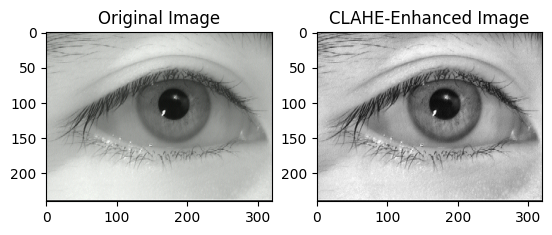

In [ ]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
clahe_img = clahe.apply(gray)
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[1].imshow(clahe_img, cmap='gray')
ax[1].set_title('CLAHE-Enhanced Image')
plt.show()


<ipython-input-6-cd35d2bdc58f>:17: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  hog_feats, hog_image = hog(gray, orientations=8, pixels_per_cell=(16, 16),


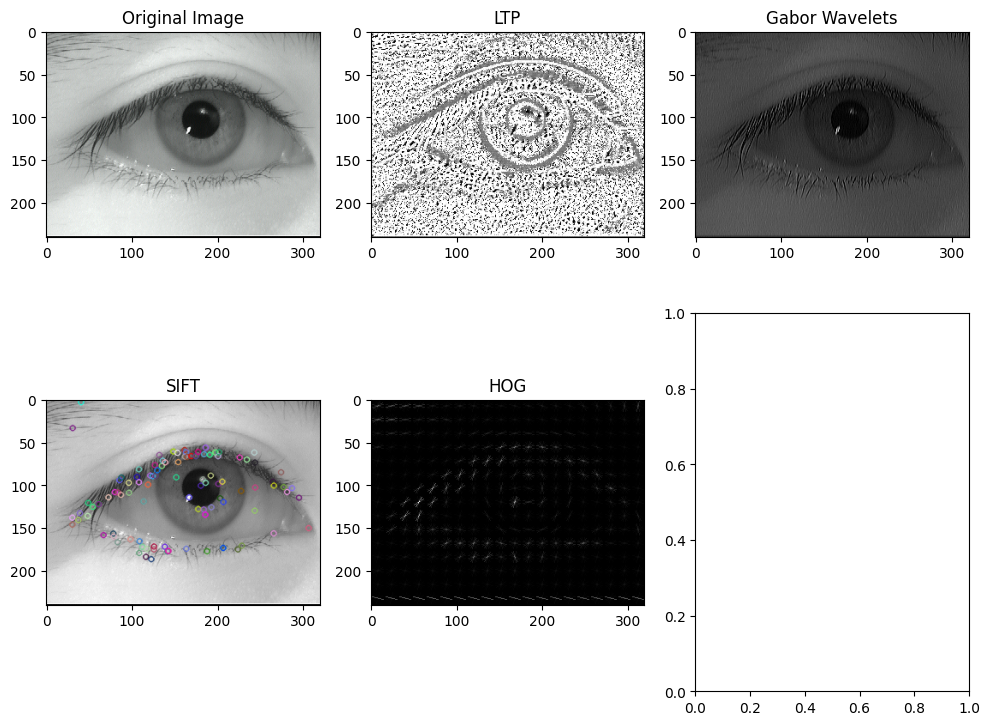

In [ ]:
radius = 3
n_points = 8 * radius
ltp = local_binary_pattern(gray, n_points, radius, method='uniform')
frequencies = [0.6, 1.2, 1.8]
thetas = [0, np.pi/4, np.pi/2, 3*np.pi/4]
kernels = []
for frequency in frequencies:
    for theta in thetas:
        kernel = np.real(gabor_kernel(frequency, theta=theta))
        kernels.append(kernel)
gabor_feats = np.zeros((gray.shape[0], gray.shape[1], len(kernels)))
for idx, kernel in enumerate(kernels):
    filtered = cv2.filter2D(gray, -1, kernel)
    gabor_feats[:, :, idx] = filtered
sift = SIFT_create()
kp_sift, sift_feats = sift.detectAndCompute(gray, None)
hog_feats, hog_image = hog(gray, orientations=8, pixels_per_cell=(16, 16),
                            cells_per_block=(1, 1), visualize=True, multichannel=False)

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(10,8))
axs[0, 0].imshow(img)
axs[0, 0].set_title('Original Image')
axs[0, 1].imshow(ltp, cmap='gray')
axs[0, 1].set_title('LTP')
axs[0, 2].imshow(gabor_feats[:, :, 0], cmap='gray')
axs[0, 2].set_title('Gabor Wavelets')
axs[1, 0].imshow(cv2.drawKeypoints(gray, kp_sift, None))
axs[1, 0].set_title('SIFT')
axs[1, 1].imshow(hog_image, cmap='gray')
axs[1, 1].set_title('HOG')
plt.tight_layout()
plt.show()


In [ ]:
from skimage.feature import greycomatrix, greycoprops
import skimage

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/data_iris.zip') as f:
  f.extractall()

In [ ]:
import cv2
import numpy as np
import warnings
warnings.filterwarnings("ignore")
from skimage.feature import local_binary_pattern
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import cv2
import os
import cv2
import pandas as pd
import numpy as np
from skimage.feature import local_binary_pattern
import pandas as pd
import os
def glcm_features_1(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    glcm = skimage.feature.graycomatrix(gray, [1, 2, 3, 4, 5], [0, np.pi/4, np.pi/2, 3*np.pi/4], levels=256, symmetric=True, normed=True)
    contrast = skimage.feature.graycoprops(glcm, 'contrast').ravel()
    dissimilarity = skimage.feature.graycoprops(glcm, 'dissimilarity').ravel()
    homogeneity = skimage.feature.graycoprops(glcm, 'homogeneity').ravel()
    energy = skimage.feature.graycoprops(glcm, 'energy').ravel()
    correlation = skimage.feature.graycoprops(glcm, 'correlation').ravel()
    ASM = skimage.feature.graycoprops(glcm, 'ASM').ravel()
    features = np.concatenate([contrast, dissimilarity, homogeneity, energy, correlation, ASM])
    return features[:100].tolist()
def lbp_features_1(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    lbp = local_binary_pattern(gray, 8, 1)
    hist, _ = np.histogram(lbp.ravel(), bins=np.arange(101), density=True)
    return hist.tolist()
def sift_features_1(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    sift = cv2.xfeatures2d.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(gray, None)
    sift_features = descriptors.mean(axis=0)
    return list(sift_features.flatten())
def orb_features_1(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    orb = cv2.ORB_create(nfeatures=100)
    kp, des = orb.detectAndCompute(gray, None)
    return np.hstack((des,des)).flatten()[:100].tolist()
def extract_features(image):
    glcm_features = glcm_features_1(image)
    lbp_features = lbp_features_1(image)
    sift_features = sift_features_1(image)
    hog_features = orb_features_1(image)
    return glcm_features + lbp_features  + sift_features + hog_features


columns = ["image_id","person_id", "features"]
features_df = pd.DataFrame(columns=columns)


In [ ]:
for foldername in os.listdir("/content/device1"):
    folderpath = os.path.join("/content/device1", foldername)
    if os.path.isdir(folderpath):
        i = 0
        for filename in os.listdir(folderpath):
            
            filepath = os.path.join(folderpath, filename)
            if os.path.isfile(filepath):
              if filepath.split('/')[-1][-3:]=="bmp":
                image = cv2.imread(filepath)
                image_features = np.array(extract_features(image)).ravel()
                # row = [filename[:-4]] + [foldername]+ [str(image_features)]
                # print(row)
                row = {"image_id":filename[:-4],"person_id":foldername, "features":image_features}
                features_df = features_df.append(row, ignore_index=True)
                i += 1
                if i==15:
                  break

In [ ]:
for foldername in os.listdir("/content/device2"):
    folderpath = os.path.join("/content/device2", foldername)
    if os.path.isdir(folderpath):
        i = 0
        for filename in os.listdir(folderpath):
            
            filepath = os.path.join(folderpath, filename)
            if os.path.isfile(filepath):
              if filepath.split('/')[-1][-3:]=="bmp":
                image = cv2.imread(filepath)
                image_features = np.array(extract_features(image)).ravel()
                # row = [filename[:-4]] + [foldername]+ [str(image_features)]
                # print(row)
                row = {"image_id":filename[:-4],"person_id":foldername, "features":image_features}
                features_df = features_df.append(row, ignore_index=True)
                i += 1
                if i==15:
                  break

In [ ]:
features_df

,image_id,person_id,features
0,0008_015,0008,"[28.127269170577808, 61.367464821398315, 40.81..."
1,0008_009,0008,"[9.565029994783465, 21.816760922762104, 16.302..."
2,0008_018,0008,"[27.68708920187683, 61.587344526444056, 40.824..."
3,0008_000,0008,"[11.441298252477823, 24.15352145347136, 16.639..."
4,0008_017,0008,"[28.30126173708798, 61.74671410508471, 40.6165..."
...,...,...,...
1795,0046_007,0046,"[7.665603808033108, 15.68244680329645, 9.96692..."
1796,0046_015,0046,"[11.385221048512769, 22.59009216514468, 13.003..."
1797,0046_002,0046,"[7.112480438184376, 15.732387831978542, 10.789..."
1798,0046_016,0046,"[10.622232003129412, 20.770152345293113, 12.85..."


In [ ]:
features_df[list(range(len(features_df['features'][0])))] = features_df['features'].apply(pd.Series)

In [ ]:
features_df.columns = features_df.columns.astype(str)
features_df

,image_id,person_id,features,0,1,2,3,4,5,6,...,418,419,420,421,422,423,424,425,426,427
0,0008_015,0008,"[28.127269170577808, 61.367464821398315, 40.81...",28.127269,61.367465,40.814630,55.110637,67.572211,61.367465,98.385084,...,6.0,27.0,114.0,49.0,47.0,10.0,184.0,124.0,58.0,60.0
1,0008_009,0008,"[9.565029994783465, 21.816760922762104, 16.302...",9.565030,21.816761,16.302352,23.389495,23.971640,21.816761,43.706920,...,154.0,64.0,148.0,193.0,33.0,130.0,3.0,136.0,154.0,185.0
2,0008_018,0008,"[27.68708920187683, 61.587344526444056, 40.824...",27.687089,61.587345,40.824664,55.079613,67.428210,61.587345,99.885398,...,125.0,247.0,204.0,113.0,11.0,91.0,214.0,246.0,140.0,178.0
3,0008_000,0008,"[11.441298252477823, 24.15352145347136, 16.639...",11.441298,24.153521,16.639470,24.486799,28.336435,24.153521,44.372843,...,5.0,52.0,207.0,238.0,202.0,133.0,45.0,167.0,208.0,65.0
4,0008_017,0008,"[28.30126173708798, 61.74671410508471, 40.6165...",28.301262,61.746714,40.616591,55.254808,68.314038,61.746714,98.815279,...,69.0,63.0,202.0,126.0,78.0,6.0,236.0,100.0,148.0,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,0046_007,0046,"[7.665603808033108, 15.68244680329645, 9.96692...",7.665604,15.682447,9.966930,16.261323,21.513316,15.682447,28.389501,...,113.0,84.0,168.0,163.0,3.0,48.0,93.0,144.0,149.0,55.0
1796,0046_015,0046,"[11.385221048512769, 22.59009216514468, 13.003...",11.385221,22.590092,13.003063,20.299189,29.047894,22.590092,36.237382,...,101.0,52.0,128.0,113.0,82.0,34.0,228.0,236.0,157.0,229.0
1797,0046_002,0046,"[7.112480438184376, 15.732387831978542, 10.789...",7.112480,15.732388,10.789111,16.906175,20.191739,15.732388,30.600203,...,117.0,56.0,224.0,113.0,70.0,34.0,244.0,36.0,189.0,246.0
1798,0046_016,0046,"[10.622232003129412, 20.770152345293113, 12.85...",10.622232,20.770152,12.858563,20.975555,27.899833,20.770152,36.290040,...,0.0,136.0,106.0,183.0,74.0,188.0,111.0,104.0,67.0,70.0


In [ ]:
features_df.to_csv("/content/drive/MyDrive/algo_features.csv")

In [ ]:
import pandas as pd
import numpy as np
from skimage.feature import local_binary_pattern

df = features_df
image = cv2.imread('/content/device1/0011/0011_018.bmp')
image_features = np.array(extract_features(image)).ravel()
face_features = image_features
distances = np.linalg.norm(df.iloc[:, 3:].values - face_features, axis=1)
min_distance_row = df.iloc[np.argmin(distances)]
person_id = min_distance_row['person_id']
print(f"Recognized person ID: {person_id}")

Recognized person ID: 0011


In [ ]:
new_df = features_df.groupby(['person_id']).mean()
new_df.reset_index()

,person_id,0,1,2,3,4,5,6,7,8,...,418,419,420,421,422,423,424,425,426,427
0,0000,17.656079,30.399471,14.940529,25.006717,41.679673,30.399471,39.762779,25.006717,58.260634,...,112.666667,124.200000,176.400000,135.366667,148.100000,105.633333,145.766667,148.833333,158.133333,109.200000
1,0001,15.117794,24.363082,14.744432,26.980337,35.834474,24.363082,39.135593,26.980337,50.748972,...,94.033333,116.600000,178.433333,141.200000,160.433333,97.233333,167.300000,167.833333,177.100000,99.466667
2,0002,21.432446,37.319400,20.334322,32.540816,51.823899,37.319400,51.617488,32.540816,73.474622,...,97.700000,110.333333,147.566667,134.700000,139.533333,101.000000,165.600000,148.033333,155.533333,128.933333
3,0003,21.817229,32.079481,19.498749,36.501533,52.797036,32.079481,50.055975,36.501533,73.692827,...,101.833333,136.300000,160.066667,141.233333,144.133333,106.500000,143.200000,136.533333,153.066667,148.300000
4,0004,28.042241,40.002245,27.359144,52.222107,67.821994,40.002245,72.289986,52.222107,99.068008,...,86.466667,72.633333,173.366667,102.833333,146.100000,80.466667,159.400000,150.400000,171.800000,124.600000
5,0005,22.501076,41.854008,25.060739,38.401715,54.486492,41.854008,65.366626,38.401715,80.567121,...,86.600000,69.366667,151.000000,114.733333,110.700000,82.666667,151.900000,126.300000,141.466667,100.700000
6,0006,22.054329,48.482526,31.478164,44.555150,55.457619,48.482526,82.078150,44.555150,83.631707,...,74.066667,82.866667,155.466667,117.333333,120.066667,83.066667,163.600000,139.433333,152.900000,125.866667
7,0007,23.122323,35.967496,24.795398,45.880043,59.166132,35.967496,66.600628,45.880043,89.553427,...,98.033333,97.866667,148.733333,125.300000,129.933333,104.900000,133.266667,135.766667,145.400000,129.933333
8,0008,15.519437,33.055317,20.823992,30.353507,38.849923,33.055317,54.778552,30.353507,58.360650,...,93.033333,102.200000,128.200000,156.400000,112.133333,112.266667,132.766667,123.166667,150.000000,91.666667
9,0009,14.889831,28.170722,19.447442,31.223484,37.721480,28.170722,50.255731,31.223484,57.381506,...,78.566667,117.700000,154.966667,139.466667,113.600000,95.366667,131.466667,133.066667,140.333333,116.366667


In [ ]:
new_df.T

person_id,0000,0001,0002,0003,0004,0005,0006,0007,0008,0009,...,0050,0051,0052,0053,0054,0055,0056,0057,0058,0059
0,17.656079,15.117794,21.432446,21.817229,28.042241,22.501076,22.054329,23.122323,15.519437,14.889831,...,12.186879,11.162860,19.728469,18.045485,16.280760,14.659010,15.429168,19.131575,13.081121,13.085261
1,30.399471,24.363082,37.319400,32.079481,40.002245,41.854008,48.482526,35.967496,33.055317,28.170722,...,22.796505,19.570880,38.845182,39.153800,28.663578,26.585010,27.068414,35.649714,26.097340,27.684389
2,14.940529,14.744432,20.334322,19.498749,27.359144,25.060739,31.478164,24.795398,20.823992,19.447442,...,12.952277,12.218884,25.679198,24.969224,17.975821,16.442771,16.494941,20.397363,16.649365,17.838360
3,25.006717,26.980337,32.540816,36.501533,52.222107,38.401715,44.555150,45.880043,30.353507,31.223484,...,20.843230,21.512838,38.483631,34.748327,29.886961,26.388408,27.719363,31.852731,25.421526,25.899769
4,41.679673,35.834474,51.823899,52.797036,67.821994,54.486492,55.457619,59.166132,38.849923,37.721480,...,31.918027,29.833016,48.059511,45.147577,39.993973,36.332535,40.522333,48.324588,32.788921,32.154896
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
423,105.633333,97.233333,101.000000,106.500000,80.466667,82.666667,83.066667,104.900000,112.266667,95.366667,...,78.100000,86.200000,141.166667,126.533333,72.600000,61.633333,85.833333,80.133333,97.300000,69.566667
424,145.766667,167.300000,165.600000,143.200000,159.400000,151.900000,163.600000,133.266667,132.766667,131.466667,...,151.600000,153.366667,133.733333,148.300000,156.800000,160.566667,185.466667,147.100000,180.533333,157.333333
425,148.833333,167.833333,148.033333,136.533333,150.400000,126.300000,139.433333,135.766667,123.166667,133.066667,...,136.700000,128.433333,154.333333,136.800000,120.833333,144.766667,131.700000,150.866667,138.300000,153.633333
426,158.133333,177.100000,155.533333,153.066667,171.800000,141.466667,152.900000,145.400000,150.000000,140.333333,...,148.500000,147.200000,146.366667,138.300000,149.866667,128.900000,134.900000,166.266667,178.433333,135.533333


In [ ]:
!pip install pandas_profiling

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 33.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 25.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 63.4 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27096 sha256=db1dad6e414e4b5d8e105683577351b3d6d54dff20b69b

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
html = ProfileReport(new_df.T,explorative=True)

In [ ]:
html

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image as pre
from tensorflow.keras.applications.resnet50 import preprocess_input
model = ResNet50(weights='imagenet', include_top=True)
def extract_features(img_path):
    img = pre.load_img(img_path, target_size=(224, 224))
    x = pre.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    features = model.predict(x,verbose=False)
    return features.flatten()


In [ ]:
features_list = []
person_ids_list = []
for foldername in os.listdir("/content/device2"):
    folderpath = os.path.join("/content/device2", foldername)
    if os.path.isdir(folderpath):

        i = 0
        for filename in os.listdir(folderpath):
            
            filepath = os.path.join(folderpath, filename)
            if os.path.isfile(filepath):
              if filepath.split('/')[-1][-3:]=="bmp":
                image = cv2.imread(filepath)
                image_features = np.array(extract_features(filepath)).ravel()
                # row = [filename[:-4]] + [foldername]+ [str(image_features)]
                # print(row)
                #row = {"image_id":filename[:-4],"person_id":foldername, "features":image_features}
                #print(image_features.shape)
                #features_df = features_df.append(row, ignore_index=True)
                i += 1
                features_list.append(image_features)
                person_ids_list.append(filename[:4])
                if i==15:
                  break
                #features = extract_features(image_paths[i])


In [ ]:
len(features_list)

In [ ]:
df = pd.DataFrame(features_list)
df.insert(0, 'person_id', person_ids_list)

In [ ]:
features_list = []
person_ids_list = []
for foldername in os.listdir("/content/device1"):
    folderpath = os.path.join("/content/device1", foldername)
    if os.path.isdir(folderpath):
        i = 0
        for filename in os.listdir(folderpath):   
            filepath = os.path.join(folderpath, filename)
            if os.path.isfile(filepath):
              if filepath.split('/')[-1][-3:]=="bmp":
                image = cv2.imread(filepath)
                image_features = np.array(extract_features(filepath)).ravel()
                # row = [filename[:-4]] + [foldername]+ [str(image_features)]
                # print(row)
                #row = {"image_id":filename[:-4],"person_id":foldername, "features":image_features}
                #print(image_features.shape)
                #features_df = features_df.append(row, ignore_index=True)
                i += 1
                features_list.append(image_features)
                person_ids_list.append(filename[:4])
                if i==15:
                  break
                #features = extract_features(image_paths[i])


In [ ]:
for i in range(len(person_ids_list)):
    df.loc[len(df)] = [person_ids_list[i]]+features_list[i].tolist()

In [ ]:
df

In [ ]:
import pandas as pd
import numpy as np
from skimage.feature import local_binary_pattern


correct = 0
total = 0
df = df
features_list = []
person_ids_list = []
for foldername in os.listdir("/content/device2"):
    folderpath = os.path.join("/content/device2", foldername)
    if os.path.isdir(folderpath):
        for filename in os.listdir(folderpath):
            i = 0
            filepath = os.path.join(folderpath, filename)
            if os.path.isfile(filepath):
              if filepath.split('/')[-1][-3:]=="bmp":
                image = cv2.imread(filepath)              
                image_features = np.array(extract_features(filepath)).ravel()
                face_features = image_features
                distances = np.linalg.norm(df.iloc[:, 1:].values - face_features, axis=1)
                min_distance_row = df.iloc[np.argmin(distances)]
                person_id = min_distance_row['person_id']
                if person_id == filename[:4]:
                  correct += 1
                total += 1
        print(f"Accuracy current {correct/total}")

Accuracy current 0.9
Accuracy current 0.85
Accuracy current 0.8333333333333334
Accuracy current 0.85
Accuracy current 0.83
Accuracy current 0.8333333333333334
Accuracy current 0.8428571428571429
Accuracy current 0.84375
Accuracy current 0.8611111111111112
Accuracy current 0.87
Accuracy current 0.8727272727272727
Accuracy current 0.8708333333333333
Accuracy current 0.8692307692307693
Accuracy current 0.8607142857142858
Accuracy current 0.86
Accuracy current 0.865625
Accuracy current 0.8676470588235294
Accuracy current 0.8666666666666667
Accuracy current 0.8710526315789474
Accuracy current 0.865
Accuracy current 0.8714285714285714
Accuracy current 0.8727272727272727
Accuracy current 0.8739130434782608
Accuracy current 0.875
Accuracy current 0.878
Accuracy current 0.8807692307692307
Accuracy current 0.8777777777777778
Accuracy current 0.8767857142857143
Accuracy current 0.8758620689655172
Accuracy current 0.8783333333333333
Accuracy current 0.8741935483870967
Accuracy current 0.8734375
Ac

In [ ]:
df.to_csv('dl_features.csv', index=False)

In [ ]:
df

,0,1,2,3,4,5,6,7,8,9,...,418,419,420,421,422,423,424,425,426,427
person_id,,,,,,,,,,,,,,,,,,,,,
0000,17.886734,30.592988,14.751787,24.968518,42.107616,30.592988,39.477270,24.968518,58.693385,63.794035,...,115.133333,129.800000,170.600000,141.833333,134.333333,115.633333,149.866667,137.333333,144.966667,104.866667
0001,14.596829,23.227464,14.304749,26.412105,34.667466,23.227464,37.833907,26.412105,49.417137,50.477284,...,101.000000,118.466667,172.333333,152.833333,162.433333,93.400000,174.333333,168.266667,168.200000,100.466667
0002,20.822697,36.617147,19.903396,31.595606,50.503318,36.617147,50.605483,31.595606,71.998515,76.277940,...,104.233333,112.066667,139.866667,151.800000,124.133333,109.366667,151.200000,119.200000,150.966667,143.366667
0003,21.571193,31.927803,19.492112,36.254834,52.238584,31.927803,50.012725,36.254834,73.174182,65.201954,...,100.433333,140.500000,160.433333,141.866667,146.966667,95.900000,151.933333,132.766667,157.833333,157.400000
0004,28.539544,41.258258,29.044845,54.565111,68.951217,41.258258,76.228145,54.565111,100.995573,83.549912,...,91.833333,77.300000,171.900000,111.633333,146.666667,90.900000,149.833333,149.233333,174.900000,128.000000
0005,22.291052,41.434890,24.959741,38.414595,54.014156,41.434890,65.188996,38.414595,79.974978,89.926017,...,93.900000,73.333333,153.066667,109.466667,123.900000,87.900000,160.366667,141.733333,144.733333,124.100000
0006,21.770684,47.992582,31.088090,43.898343,54.818619,47.992582,81.165371,43.898343,82.799013,108.753669,...,73.600000,81.866667,152.600000,122.333333,131.966667,79.200000,160.100000,134.300000,157.866667,122.266667
0007,24.048492,37.142341,25.367474,47.255607,61.595493,37.142341,68.286888,47.255607,93.173955,83.851467,...,86.000000,95.033333,145.933333,123.900000,124.233333,102.733333,135.033333,130.233333,141.600000,124.700000
0008,16.298129,34.886928,22.022455,31.691162,40.693019,34.886928,57.402098,31.691162,61.000131,78.992429,...,96.300000,106.566667,134.133333,141.533333,120.466667,111.700000,128.866667,126.500000,145.833333,89.800000


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import os
data_dir = "/content/device1/"
val_percent = 0.1
img_size = (224, 224)
batch_size = 32
num_val_samples = int(len(os.listdir(data_dir)) * val_percent)
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   validation_split=val_percent)

train_generator_1 = train_datagen.flow_from_directory(data_dir,
                                                    target_size=img_size,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    subset='training')

val_generator_1 = train_datagen.flow_from_directory(data_dir,
                                                  target_size=img_size,
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  subset='validation')


Found 1080 images belonging to 60 classes.
Found 120 images belonging to 60 classes.


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.applications import VGG19
img_shape = (224, 224, 3)
num_classes = 60
vgg19 = VGG19(weights='imagenet', include_top=False, input_shape=img_shape)
for layer in vgg19.layers:
    layer.trainable = False
model = Sequential()
model.add(vgg19)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_generator_1, epochs=10, validation_data=val_generator_1)


80134624/80134624 [==============================] - 1s 0us/step
Epoch 1/10
34/34 [==============================] - 927s 27s/step - loss: 5.1639 - accuracy: 0.0694 - val_loss: 3.4674 - val_accuracy: 0.1917
Epoch 2/10
34/34 [==============================] - 863s 25s/step - loss: 3.0525 - accuracy: 0.2926 - val_loss: 2.8996 - val_accuracy: 0.2500
Epoch 3/10
34/34 [==============================] - 919s 27s/step - loss: 2.2273 - accuracy: 0.5407 - val_loss: 2.2003 - val_accuracy: 0.4333
Epoch 4/10
34/34 [==============================] - 857s 25s/step - loss: 1.5693 - accuracy: 0.6787 - val_loss: 1.4805 - val_accuracy: 0.6583
Epoch 5/10
34/34 [==============================] - 857s 25s/step - loss: 1.0952 - accuracy: 0.8102 - val_loss: 1.2890 - val_accuracy: 0.6417
Epoch 6/10
34/34 [==============================] - 911s 27s/step - loss: 0.7757 - accuracy: 0.8954 - val_loss: 0.8360 - val_accuracy: 0.8667
Epoch 7/10
10/34 [=======>......................] - ETA: 9:30 - loss: 0.6135 - accu

KeyboardInterrupt: ignored

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [ ]:
train_generator_2 = train_datagen.flow_from_directory("/content/device2/",
                                                    target_size=img_size,
                                                    batch_size=batch_size,
                                                    class_mode='categorical',
                                                    subset='training')

val_generator_2 = train_datagen.flow_from_directory("/content/device2/",
                                                  target_size=img_size,
                                                  batch_size=batch_size,
                                                  class_mode='categorical',
                                                  subset='validation')

Found 1080 images belonging to 60 classes.
Found 120 images belonging to 60 classes.


In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Flatten
from keras.applications import VGG19
img_shape = (224, 224, 3)
num_classes = 60
vgg19 = VGG19(weights='imagenet', include_top=False, input_shape=img_shape)
for layer in vgg19.layers:
    layer.trainable = False
model = Sequential()
model.add(vgg19)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_generator_2, epochs=10, validation_data=val_generator_2)


In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
